In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r"C:\Users\Tushar\Desktop\code\p2\train.csv")
test=pd.read_csv(r"C:\Users\Tushar\Desktop\code\p2\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'bar graph of people according to ticket class in which people survived')

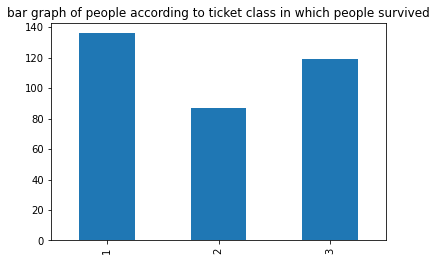

In [14]:
plt.plot(figSize=(10,9))
train.loc[train["Survived"]==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title("bar graph of people according to ticket class in which people survived")



Text(0.5, 1.0, "bar graph of people according to ticket class in which people could'nt survived")

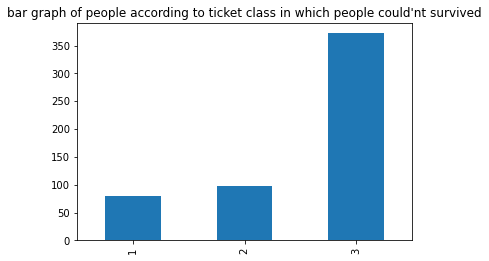

In [13]:
plt.plot(figSize=(10,9))
train.loc[train["Survived"]==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title("bar graph of people according to ticket class in which people could'nt survived")

([<matplotlib.axis.XTick at 0x1c6e22209d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

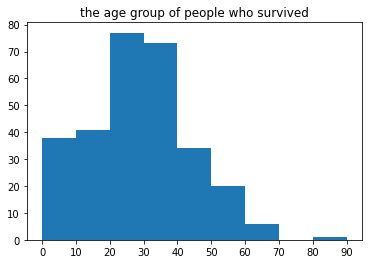

In [17]:
plt.plot(figSize=(10,9))
age=train.loc[train.Survived==1,'Age']
plt.title("the age group of people who survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

([<matplotlib.axis.XTick at 0x1c6e22a8a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

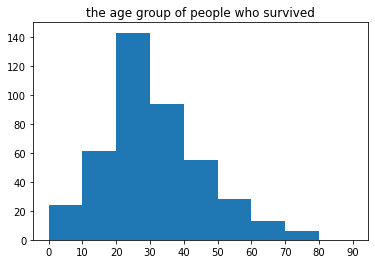

In [18]:
plt.plot(figSize=(10,9))
age=train.loc[train.Survived==0,'Age']
plt.title("the age group of people who survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

([<matplotlib.patches.Wedge at 0x1c6e23a85b0>,
 [Text(0.21796074470061885, 1.0781897392247581, 'c=Chembourge'),
  Text(-0.9386199348462434, -0.5735787809091564, 'Q=Queenstone'),
  Text(0.7481901265904364, -0.8063569522690227, 's=Southamption')],
 [Text(0.11888767892761026, 0.5881034941225953, '43.65%'),
  Text(-0.5119745099161327, -0.3128611532231762, '30.16%'),
  Text(0.40810370541296526, -0.43983106487401236, '26.19%')])

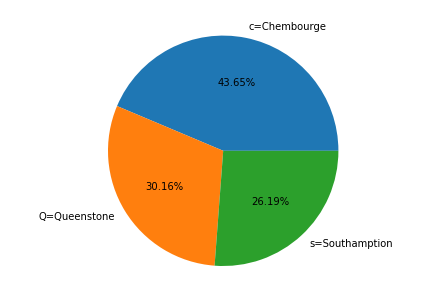

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
l=['c=Chembourge','Q=Queenstone','s=Southamption']
s=[0.55,0.38,0.33]
ax.pie(s,labels=l,autopct='%1.2f%%')

In [47]:
column=["Age","Pclass","SibSp","Parch","Fare"]
train.dropna(axis=0,inplace=True)
x=train[column]
y=train["Survived"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

In [57]:
print(accuracy_score(y_test,y_pred)*100)

75.67567567567568
